<a href="https://colab.research.google.com/github/Chanwoochan/2023MechanicalEngineeringExperimentDesign/blob/main/%EC%9E%AC%EB%A3%8C%EC%97%AD%ED%95%99%EC%8B%A4%ED%97%98/%EC%9E%AC%EB%A3%8C%EA%B3%B5%ED%95%99%EC%8B%A4%ED%97%98%EA%B7%B8%EB%9E%98%ED%94%84%EB%B0%8F%EB%B6%88%ED%99%95%EB%8F%84%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install uncertainties
#20191089 김찬우 기계공학실험설계 재료역학 실험 그래프 및 까다로운 불확도 계산

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.1 MB/s eta 0:00:00


In [2]:
 from uncertainties import ufloat
 import numpy

In [11]:
# 단면2차모멘트 계산에서의 불확도의 전파
h = numpy.array([ufloat(3.1, 0.025), ufloat(3.1, 0.025), ufloat(3.1, 0.025)])
b = numpy.array([ufloat(25.25, 0.025), ufloat(25.3, 0.025), ufloat(25.4, 0.025)])

I = b * h ** 3 / 12 # 계산값과 불확도
I_per = numpy.zeros(3)
for i in range(3) :
  I_per[i] = 100 * I[i].s / I[i].n # 퍼센트불확도

I, I_per

(array([62.68522916666668+/-1.5178475620868048,
        62.80935833333334+/-1.5208481804098344,
        63.05761666666667+/-1.5268494466254983], dtype=object),
 array([2.42137994, 2.42137194, 2.4213561 ]))

In [12]:
import matplotlib.pyplot as plt
import pandas

In [14]:
data = pandas.read_csv('kcw.csv')
print(data)

      P  ep    y1         e1    y2         e2    y3        e3      L      a1  \
0    20   5  0.51  19.245009  0.46   6.641414  0.22  6.153846  400.0  0.0285   
1    40   5  1.09   7.639141  0.81   3.672808  0.42  0.787402  300.0  0.0196   
2    60   5  1.69   7.026241  1.24   1.678763  0.62  1.081081  200.0  0.0101   
3    80   5  2.20   6.102283  1.61   1.620384  0.83  0.403226    NaN     NaN   
4   100   5  2.82   3.922142  2.03   0.714574  1.02  0.651466    NaN     NaN   
5   120   5  3.36   2.828686  2.40   1.548752  1.22  0.544959    NaN     NaN   
6    20   5  0.32   7.434126  0.23   6.641414  0.13  2.500000    NaN     NaN   
7    40   5  0.74   5.560274  0.45   6.282356  0.26  1.265823    NaN     NaN   
8    60   5  1.05   1.454786  0.74   1.186436  0.39  1.694915    NaN     NaN   
9    80   5  1.34   2.763158  0.94   4.797074  0.52  0.645161    NaN     NaN   
10  100   5  1.71   1.033497  1.23   0.979769  0.64  0.523560    NaN     NaN   
11  120   5  2.05   1.170634  1.40   0.2

In [42]:
# 탄성계수 계산에서의 불확도의 전파
L = ufloat(400, 0.5)
i =  numpy.array([I[0],I[1],I[2],I[0],I[1],I[2],I[0],I[1],I[2]])
l = numpy.array([ufloat(400, 0.5),ufloat(300, 0.5),ufloat(200, 0.5),ufloat(400, 0.5),ufloat(300, 0.5),ufloat(200, 0.5),ufloat(400, 0.5),ufloat(300, 0.5),ufloat(200, 0.5)])
a = numpy.array([ufloat(data.a1[0], data.sa1[0]*0.01*data.a1[0]), ufloat(data.a1[1], data.sa1[1]*0.01*data.a1[1]), ufloat(data.a1[2], data.sa1[2]*0.01*data.a1[2]),
                 ufloat(data.a2[0], data.sa2[0]*0.01*data.a2[0]), ufloat(data.a2[1], data.sa2[1]*0.01*data.a2[1]), ufloat(data.a2[2], data.sa2[2]*0.01*data.a2[2]),
                 ufloat(data.a3[0], data.sa3[0]*0.01*data.a3[0]), ufloat(data.a3[1], data.sa3[1]*0.01*data.a3[1]), ufloat(data.a3[2], data.sa3[2]*0.01*data.a3[2])])

E = 0.1 * (3 * L - l) * (l ** 2) / (6 * i * a) # 계산값과 불확도
E_per = numpy.zeros(9)
for i in range(9) :
  E_per[i] = 100 * E[i].s / E[i].n # 퍼센트불확도

E, E_per

(array([1194121.8396214254+/-31188.493880595168,
        1096612.8750252554+/-30575.88863841037,
        1046766.4994220788+/-26247.14298408675,
        2013755.7650420489+/-66385.46726445465,
        1791134.3625412507+/-68599.72849685415,
        1678149.4673274597+/-43007.3895936386,
        832089.7904452475+/-33916.49993866447,
        736082.6147429796+/-23468.94480198282,
        652613.6817384566+/-16545.121700849915], dtype=object),
 array([2.61183514, 2.78821171, 2.50744966, 3.29659974, 3.82995994,
        2.5627866 , 4.0760625 , 3.18835744, 2.53520914]))

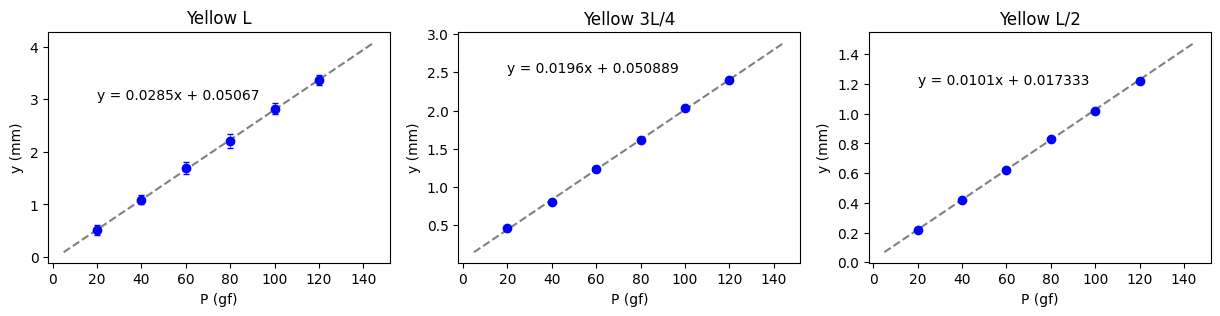

In [87]:
plt.figure(figsize=[15,3])

plt.subplot(1,3,1)
x = numpy.arange(5, 145, 0.01)
y = data.a1[0]*x - 0.05067
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[0:6], data.y1[0:6], yerr=data.y1[0:6]*(data.e1[0:6]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(20, 3, f'y = {data.a1[0]}x + {0.05067}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("Yellow L")

plt.subplot(1,3,2)
x = numpy.arange(5, 145, 0.01)
y = data.a1[1]*x + 0.050889
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[0:6], data.y2[0:6], yerr=data.y2[0:6]*(data.e2[0:6]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(20, 2.5, f'y = {data.a1[1]}x + {0.050889}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("Yellow 3L/4")

plt.subplot(1,3,3)
x = numpy.arange(5, 145, 0.01)
y = data.a1[2]*x + 0.017333
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[0:6], data.y3[0:6], yerr=data.y3[0:6]*(data.e3[0:6]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(20, 1.2, f'y = {data.a1[2]}x + {0.017333}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("Yellow L/2")

plt.show()
#하중에 따른 처짐량을 그래프에 표시하고 에러바 도시.

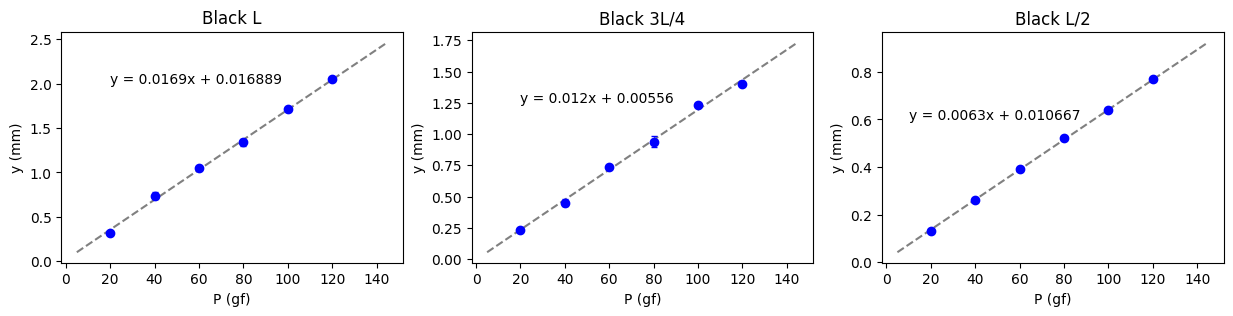

In [92]:
plt.figure(figsize=[15,3])

plt.subplot(1,3,1)
x = numpy.arange(5, 145, 0.01)
y = data.a2[0]*x + 0.016889
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[6:12], data.y1[6:12], yerr=data.y1[6:12]*(data.e1[6:12]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(20, 2, f'y = {data.a2[0]}x + {0.016889}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("Black L")

plt.subplot(1,3,2)
x = numpy.arange(5, 145, 0.01)
y = data.a2[1]*x - 0.00556
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[6:12], data.y2[6:12], yerr=data.y2[6:12]*(data.e2[6:12]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(20, 1.25, f'y = {data.a2[1]}x + {0.00556}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("Black 3L/4")

plt.subplot(1,3,3)
x = numpy.arange(5, 145, 0.01)
y = data.a2[2]*x + 0.010667
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[6:12], data.y3[6:12], yerr=data.y3[6:12]*(data.e3[6:12]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(10, 0.6, f'y = {data.a2[2]}x + {0.010667}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("Black L/2")

plt.show()
#하중에 따른 처짐량을 그래프에 표시하고 에러바 도시.

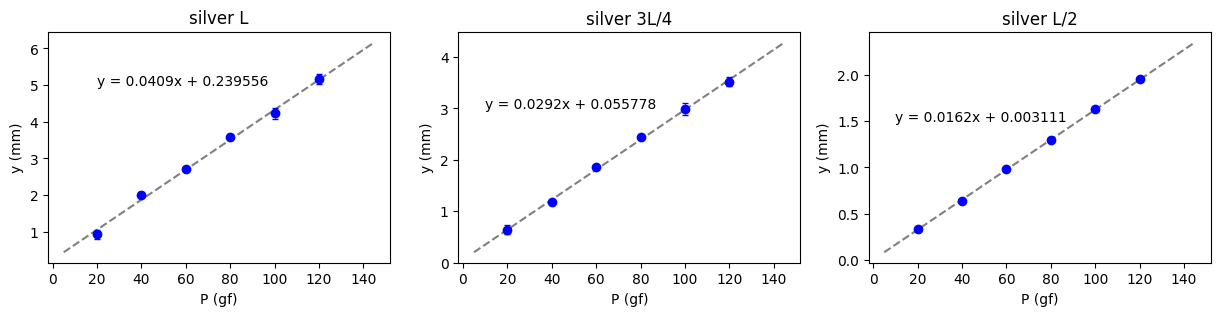

In [93]:
plt.figure(figsize=[15,3])

plt.subplot(1,3,1)
x = numpy.arange(5, 145, 0.01)
y = data.a3[0]*x + 0.239556
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[12:18], data.y1[12:18], yerr=data.y1[12:18]*(data.e1[12:18]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(20, 5, f'y = {data.a3[0]}x + {0.239556}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("silver L")

plt.subplot(1,3,2)
x = numpy.arange(5, 145, 0.01)
y = data.a3[1]*x + 0.055778
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[12:18], data.y2[12:18], yerr=data.y2[12:18]*(data.e2[12:18]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(10, 3, f'y = {data.a3[1]}x + {0.055778}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("silver 3L/4")

plt.subplot(1,3,3)
x = numpy.arange(5, 145, 0.01)
y = data.a3[2]*x + 0.003111
plt.plot(x,y, '--', color = 'gray')
plt.errorbar(data.P[12:18], data.y3[12:18], yerr=data.y3[12:18]*(data.e3[12:18]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(0,146,20))
plt.text(10, 1.5, f'y = {data.a3[2]}x + {0.003111}')
plt.xlabel("P (gf)")
plt.ylabel("y (mm)")
plt.title("silver L/2")

plt.show()
#하중에 따른 처짐량을 그래프에 표시하고 에러바 도시.

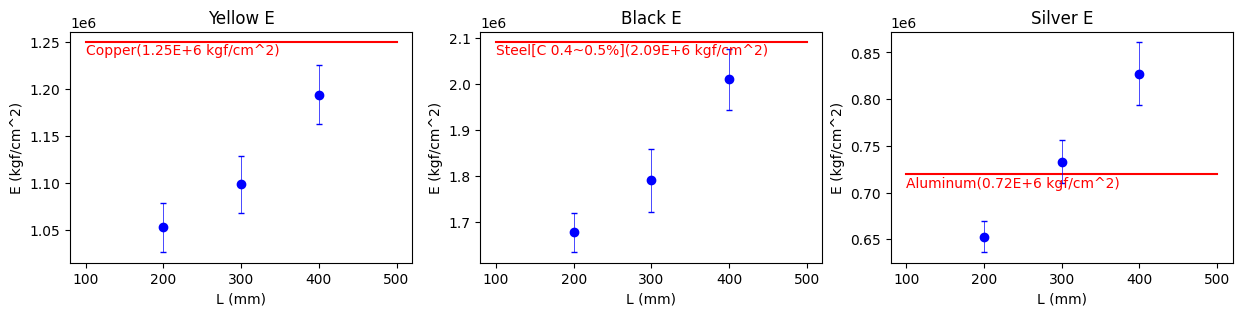

In [119]:
plt.figure(figsize=[15,3])

plt.subplot(1,3,1)
plt.plot([100,500],[1.25E+6,1.25E+6],'r')
plt.text(100, 1.25E+6 * 0.99 , f'Copper(1.25E+6 kgf/cm^2)', color='red')
plt.errorbar(data.L[0:3], data.E1[0:3], yerr=E_per[0:3]*(data.E1[0:3]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(100,501,100))
plt.xlabel("L (mm)")
plt.ylabel("E (kgf/cm^2)")
plt.title("Yellow E")

plt.subplot(1,3,2)
plt.plot([100,500],[2.09E+6,2.09E+6],'r')
plt.text(100, 2.09E+6 * 0.987 , f'Steel[C 0.4~0.5%](2.09E+6 kgf/cm^2)', color='red')
plt.errorbar(data.L[0:3], data.E2[0:3],  yerr=E_per[3:6]*(data.E2[0:3]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(100,501,100))
plt.xlabel("L (mm)")
plt.ylabel("E (kgf/cm^2)")
plt.title("Black E")

plt.subplot(1,3,3)
plt.plot([100,500],[0.72E+6,0.72E+6],'r')
plt.text(100, 0.72E+6 * 0.98 , f'Aluminum(0.72E+6 kgf/cm^2)', color='red')
plt.errorbar(data.L[0:3], data.E3[0:3],  yerr=E_per[6:9]*(data.E3[0:3]/100),  fmt="bo", elinewidth=0.5, capsize=2)
plt.xticks(numpy.arange(100,501,100))
plt.ticklabel_format(axis='y',useOffset=False, style='sci', scilimits=(6,6))
plt.xlabel("L (mm)")
plt.ylabel("E (kgf/cm^2)")
plt.title("Silver E")

plt.show()